In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px




In [2]:
diabetes = pd.read_csv('data/diabetes.csv')

Загрузите его к себе в ноутбук, охарактеризуйте имеющиеся колонки и число наблюдений. Проанализируйте, какие факторы связаны с развитием диабета, а какие нет.

In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pragnancies - беременность 
Glucose - уровень глюкозы крови; 
BloodPressure - артериальное давление; 
SkinThickness - величина кожной склакди;
Insulin - инсулин;
BMI - индекс массы тела;
DiabetesPedigreeFunction - отягощенный семейный анамнез;
Age - возраст;
Outcome- подтвержденный диагноз СД.

Всего 768 наблюдений


<AxesSubplot: >

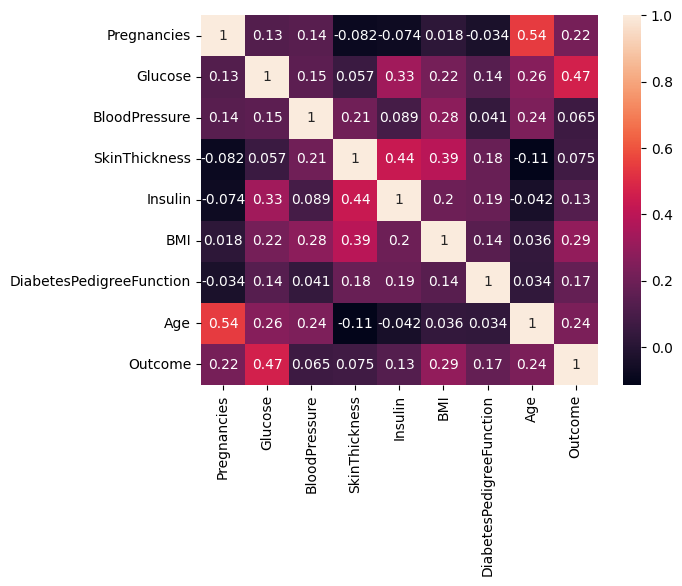

In [4]:
sns.heatmap(diabetes.corr(), annot= True)

С развитием диабета связан следующие признаки: Age, Glucose, Insulin, BMI, Pregnancies

In [5]:
colum =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age','Outcome']

In [6]:
diagramm = diabetes.sort_values(
    by = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age','Outcome'],
    ascending= (True, True, True, True, True,True, True, True,True),
    ignore_index= True
)
diagramm.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,13,158,114,0,0,42.3,0.257,44,1
764,14,100,78,25,184,36.6,0.412,46,1
765,14,175,62,30,0,33.6,0.212,38,1
766,15,136,70,32,110,37.1,0.153,43,1
767,17,163,72,41,114,40.9,0.817,47,1


У людей с диабетом медиана ИМТ выше.

<AxesSubplot: xlabel='Outcome', ylabel='BMI'>

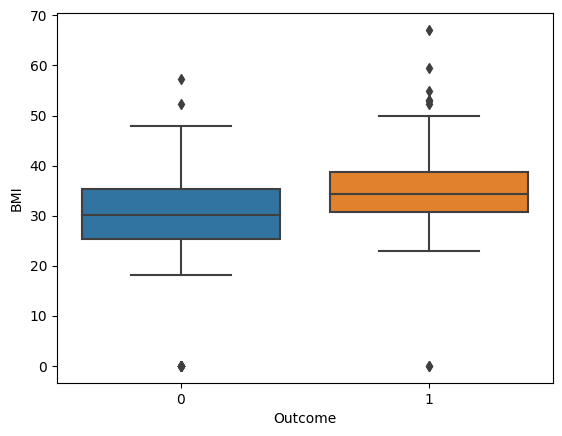

In [7]:
sns.boxplot(
    data=diabetes,
    x='Outcome',
    y= 'BMI'
)

Имеется взаимосвязь между диабетом и отягощенным семейным анамнезом.

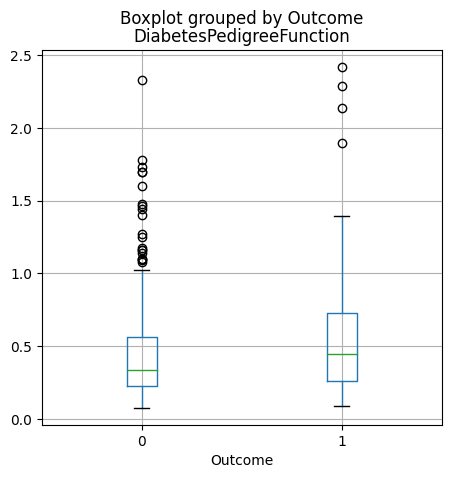

In [8]:
boxplot = diabetes.boxplot(
    column='DiabetesPedigreeFunction' , 
    by = 'Outcome',
    figsize=(5,5)
)

Переводим ИМТ в степени Ожирения ( 30-35 1 степени, 35-40 - 2 степень, выше 40 - 3 степень)

In [9]:
BMI_step = diabetes['BMI']

def BMI_I(BMI_step: pd.Series) -> pd.Series:
    """
    Функция переводим ИМТ в степень Ожирения, согласно классификации ВОЗ.
    Ожирение 1 степени- ИМТ = 30-35
    Ожирение 2 степени -ИМТ = 35-40
    Ожирение 3 степени -ИМТ = >40.
    :param BMI_step: pd.Series 
    """

    if BMI_step <30: BMI_step = 0
    if 40 <= BMI_step: BMI_step = 3
    if 40 > BMI_step >=35: BMI_step = 2
    if 35 > BMI_step >=30: BMI_step = 1
    return BMI_step



diabetes['BMI'] = diabetes['BMI'].apply(BMI_I)

In [10]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
diabetes['BloodPressure'] = diabetes['BloodPressure'].apply(lambda x: 1.0 if x >=140 else 0.0)

                    ВТОРОЙ ДАТАСЕТ
                    

In [12]:
train = pd.read_csv('data/train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [13]:
test = pd.read_csv('data/test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               848 non-null    int64  
 1   age              848 non-null    int64  
 2   education        830 non-null    float64
 3   sex              848 non-null    object 
 4   is_smoking       848 non-null    object 
 5   cigsPerDay       841 non-null    float64
 6   BPMeds           839 non-null    float64
 7   prevalentStroke  848 non-null    int64  
 8   prevalentHyp     848 non-null    int64  
 9   diabetes         848 non-null    int64  
 10  totChol          836 non-null    float64
 11  sysBP            848 non-null    float64
 12  diaBP            848 non-null    float64
 13  BMI              843 non-null    float64
 14  heartRate        848 non-null    float64
 15  glucose          764 non-null    float64
dtypes: float64(9), int64(5), object(2)
memory usage: 106.1+ KB


In [14]:
cols_null_percent = train.isnull().mean() * 100
cols_with_null = cols_null_percent[
    cols_null_percent > 0
].sort_values(ascending=True)
cols_with_null

heartRate     0.029499
BMI           0.412979
cigsPerDay    0.648968
totChol       1.120944
BPMeds        1.297935
education     2.566372
glucose       8.967552
dtype: float64

In [15]:
train_copy = train.copy()
n = train_copy.shape[0] 
thresh_usl = n*0.7
train_copy = train_copy.dropna(thresh=thresh_usl, axis=1)
m = train_copy.shape[1] 
train_copy = train_copy.dropna(thresh=m-2, axis=0)
train_copy.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3389 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3389 non-null   int64  
 1   age              3389 non-null   int64  
 2   education        3302 non-null   float64
 3   sex              3389 non-null   object 
 4   is_smoking       3389 non-null   object 
 5   cigsPerDay       3367 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3389 non-null   int64  
 8   prevalentHyp     3389 non-null   int64  
 9   diabetes         3389 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3389 non-null   float64
 12  diaBP            3389 non-null   float64
 13  BMI              3375 non-null   float64
 14  heartRate        3388 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3389 non-null   int64  
dtypes: float64(9),

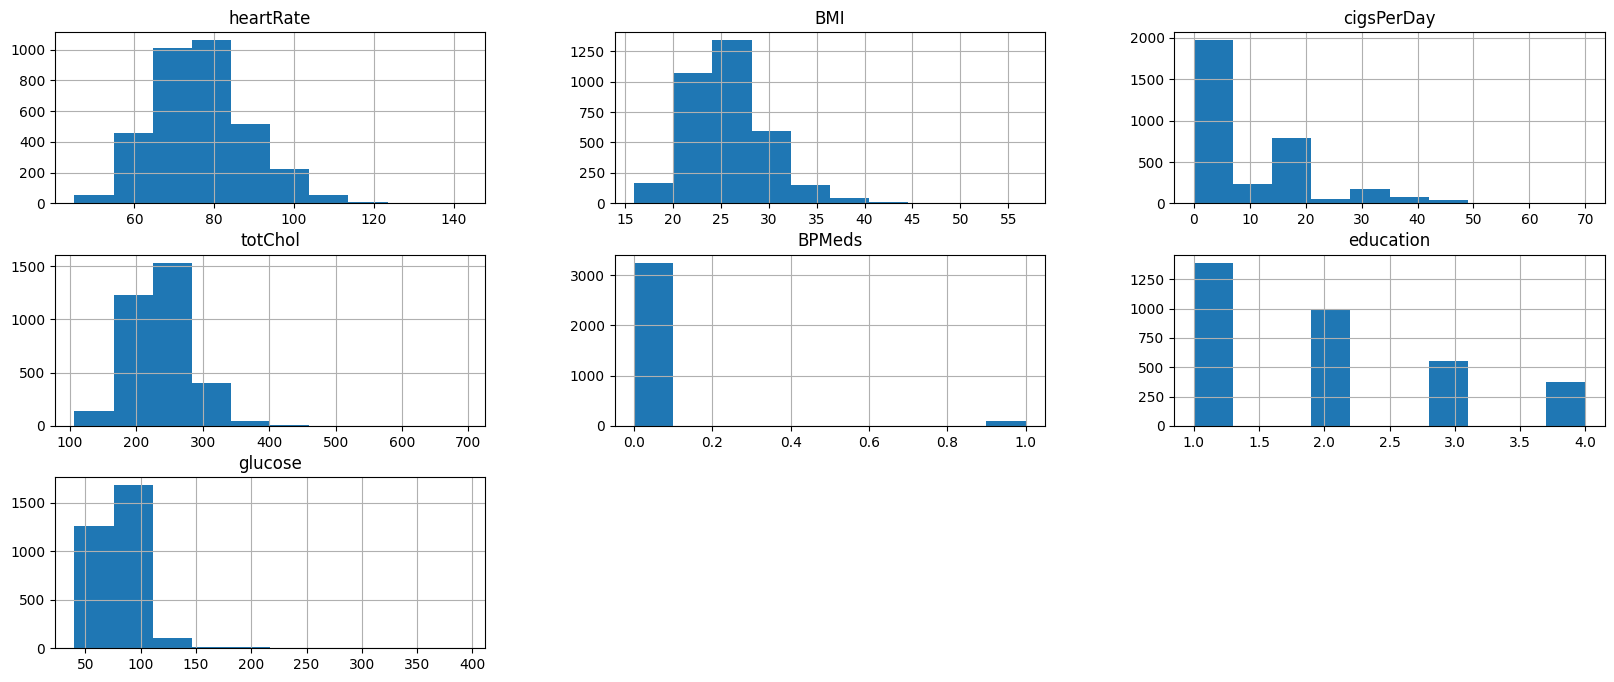

In [16]:
cols = cols_with_null.index
train_copy[cols].hist(figsize=(20, 8));

Судя по распределениям признаки Glucose, totChol, BMI - близки к логонармальным - их заполняем медианой!
Признаки heartRate, cigsPerDay, education - попробуем заполнить модой.

In [17]:
train_copy.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [18]:
values = {
    'glucose': train_copy['glucose'].median(),
    'totChol': train_copy['totChol'].median(),
    'BMI': train_copy['BMI'].median(),
    'heartRate': train_copy['heartRate'].mode()[0],
    'cigsPerDay': train_copy['cigsPerDay'].mode()[0],
    'education': train_copy['education'].mode()[0],
    'BPMeds': train_copy['BPMeds'].mode()[0]
}
train_copy = train_copy.fillna(values)
train_copy.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3389 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3389 non-null   int64  
 1   age              3389 non-null   int64  
 2   education        3389 non-null   float64
 3   sex              3389 non-null   object 
 4   is_smoking       3389 non-null   object 
 5   cigsPerDay       3389 non-null   float64
 6   BPMeds           3389 non-null   float64
 7   prevalentStroke  3389 non-null   int64  
 8   prevalentHyp     3389 non-null   int64  
 9   diabetes         3389 non-null   int64  
 10  totChol          3389 non-null   float64
 11  sysBP            3389 non-null   float64
 12  diaBP            3389 non-null   float64
 13  BMI              3389 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3389 non-null   float64
 16  TenYearCHD       3389 non-null   int64  
dtypes: float64(9),

In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               848 non-null    int64  
 1   age              848 non-null    int64  
 2   education        830 non-null    float64
 3   sex              848 non-null    object 
 4   is_smoking       848 non-null    object 
 5   cigsPerDay       841 non-null    float64
 6   BPMeds           839 non-null    float64
 7   prevalentStroke  848 non-null    int64  
 8   prevalentHyp     848 non-null    int64  
 9   diabetes         848 non-null    int64  
 10  totChol          836 non-null    float64
 11  sysBP            848 non-null    float64
 12  diaBP            848 non-null    float64
 13  BMI              843 non-null    float64
 14  heartRate        848 non-null    float64
 15  glucose          764 non-null    float64
dtypes: float64(9), int64(5), object(2)
memory usage: 106.1+ KB


In [20]:
test_copy = test.copy()

In [21]:
cols_null_percent_1 = test_copy.isnull().mean() * 100
cols_with_null_1 = cols_null_percent_1[
    cols_null_percent_1 > 0
].sort_values(ascending=True)
cols_with_null_1

BMI           0.589623
cigsPerDay    0.825472
BPMeds        1.061321
totChol       1.415094
education     2.122642
glucose       9.905660
dtype: float64

In [22]:
values_1 = {
    'glucose': test_copy['glucose'].median(),
    'totChol': test_copy['totChol'].median(),
    'BMI': test_copy['BMI'].mode(),
    'cigsPerDay': test_copy['cigsPerDay'].mode()[0],
    'education': train_copy['education'].mode()[0],
    'BPMeds': train_copy['BPMeds'].mode()[0]
}
test_copy = test_copy.fillna(values_1)

In [23]:
df_2 = pd.concat([train_copy, test], ignore_index=True)

Признак TenYearCHD не будем в дальнейшем анализировать, т.к. его не заполнить правильно - удалим его

In [24]:
df_2 = df_2.drop('TenYearCHD', axis=1)

Также удаляем лишний столбец id не несущий важной информации

In [25]:
df_2 = df_2.drop('id', axis=1)

Из следующей корреляционной матрицы мы видим, что наблюдается зависимость у: глюкозы с диабетом, САД и ДАД, рисками ГБ и САД/ДАД, небольшая свзяь между ИМТ и возрастом/САД

C:\Users\rinen\AppData\Local\Temp\ipykernel_15464\397518531.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_2.corr(), cmap='BuGn')


<AxesSubplot: >

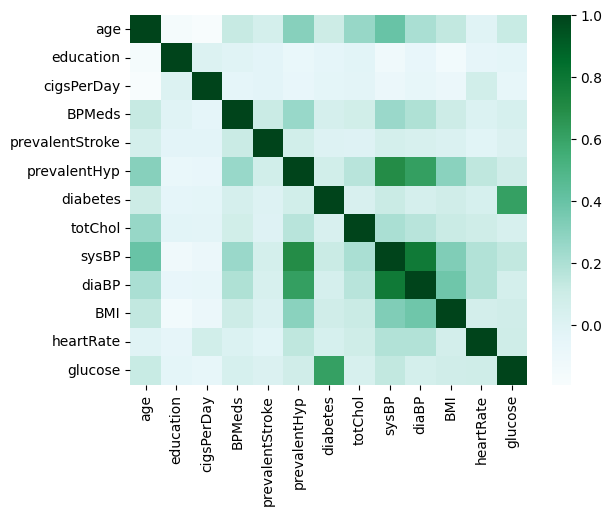

In [26]:

sns.heatmap(df_2.corr(), cmap='BuGn')

array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'education'}>,
        <AxesSubplot: title={'center': 'cigsPerDay'}>,
        <AxesSubplot: title={'center': 'BPMeds'}>],
       [<AxesSubplot: title={'center': 'prevalentStroke'}>,
        <AxesSubplot: title={'center': 'prevalentHyp'}>,
        <AxesSubplot: title={'center': 'diabetes'}>,
        <AxesSubplot: title={'center': 'totChol'}>],
       [<AxesSubplot: title={'center': 'sysBP'}>,
        <AxesSubplot: title={'center': 'diaBP'}>,
        <AxesSubplot: title={'center': 'BMI'}>,
        <AxesSubplot: title={'center': 'heartRate'}>],
       [<AxesSubplot: title={'center': 'glucose'}>, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

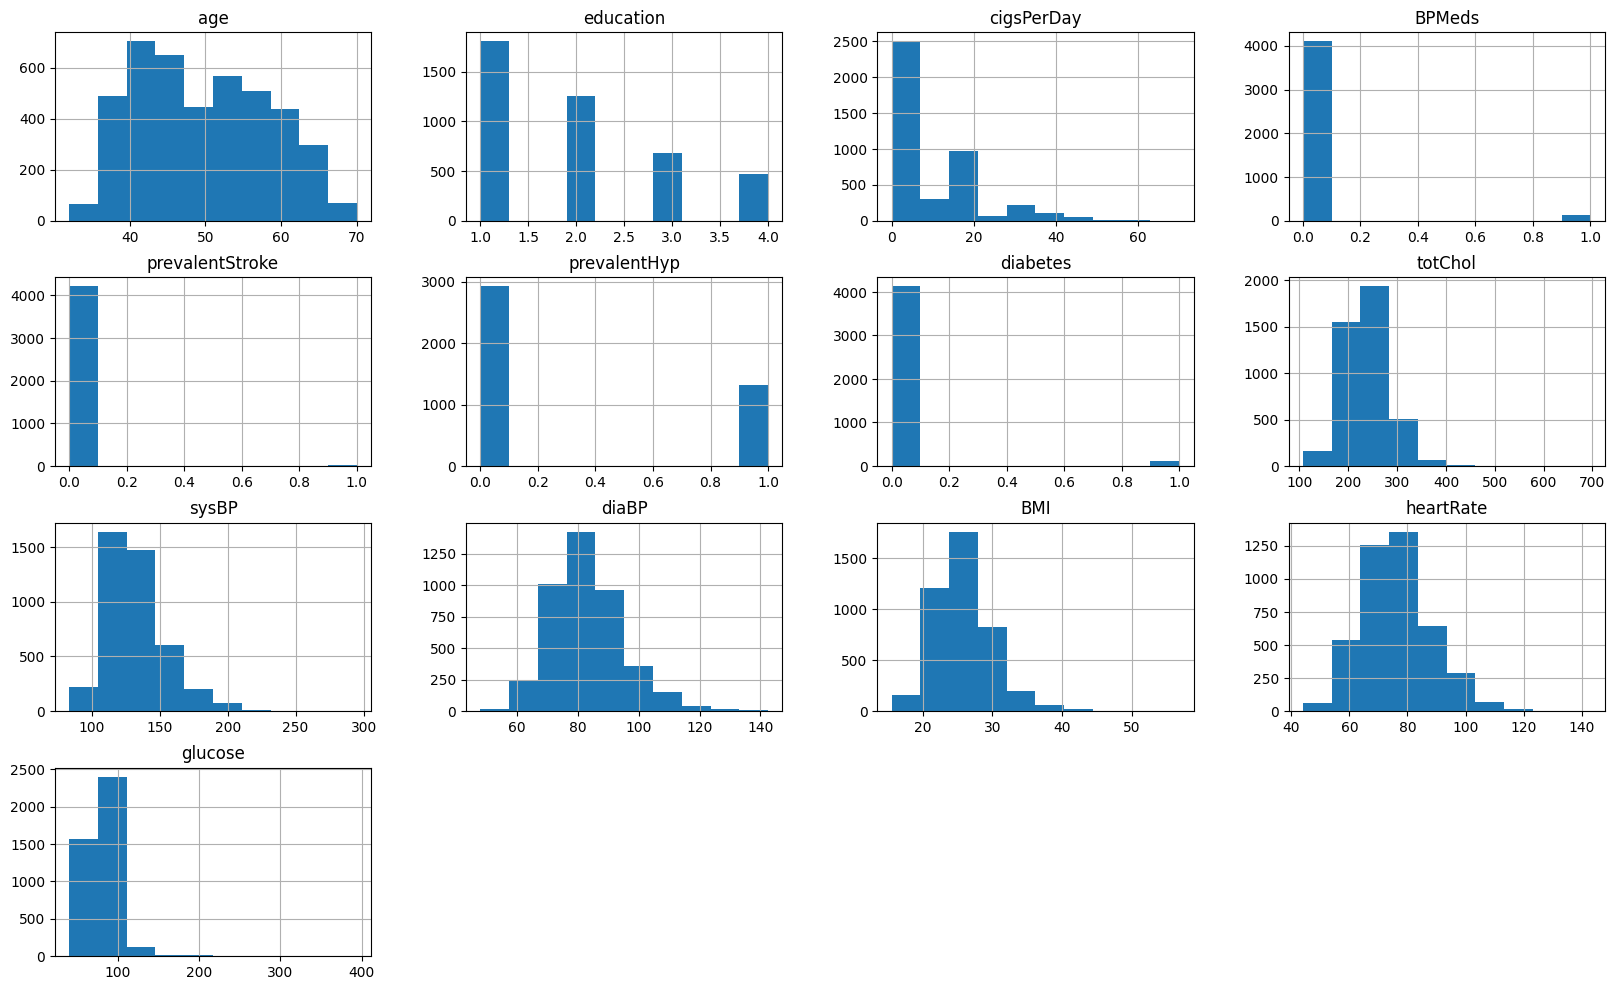

In [27]:

df_2[df_2.columns].hist(figsize=(20,12))

Приводим столбы sysBP и diaBP к общему значению с 3 датасетом по HighBP (Начиная с АГ 1 степени >140, диастолическую норму при повышенном САД будет считать как общую гипертензию)

In [28]:
df_2['sysBP'] = df_2['sysBP'].apply(lambda x: 1.0 if x >=140 in df_2['sysBP'] else 0.0)
df_2 = df_2.drop('diaBP', axis=1)
df_2 = df_2.rename(columns={'sysBP':'HighBP'})

Переводим ИМТ в степени Ожирения ( 30-35 1 степени, 35-40 - 2 степень, выше 40 - 3 степень)

In [29]:
df_2['BMI']=  df_2['BMI'].apply(BMI_I)

array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'education'}>,
        <AxesSubplot: title={'center': 'cigsPerDay'}>],
       [<AxesSubplot: title={'center': 'BPMeds'}>,
        <AxesSubplot: title={'center': 'prevalentStroke'}>,
        <AxesSubplot: title={'center': 'prevalentHyp'}>],
       [<AxesSubplot: title={'center': 'diabetes'}>,
        <AxesSubplot: title={'center': 'totChol'}>,
        <AxesSubplot: title={'center': 'HighBP'}>],
       [<AxesSubplot: title={'center': 'BMI'}>,
        <AxesSubplot: title={'center': 'heartRate'}>,
        <AxesSubplot: title={'center': 'glucose'}>]], dtype=object)

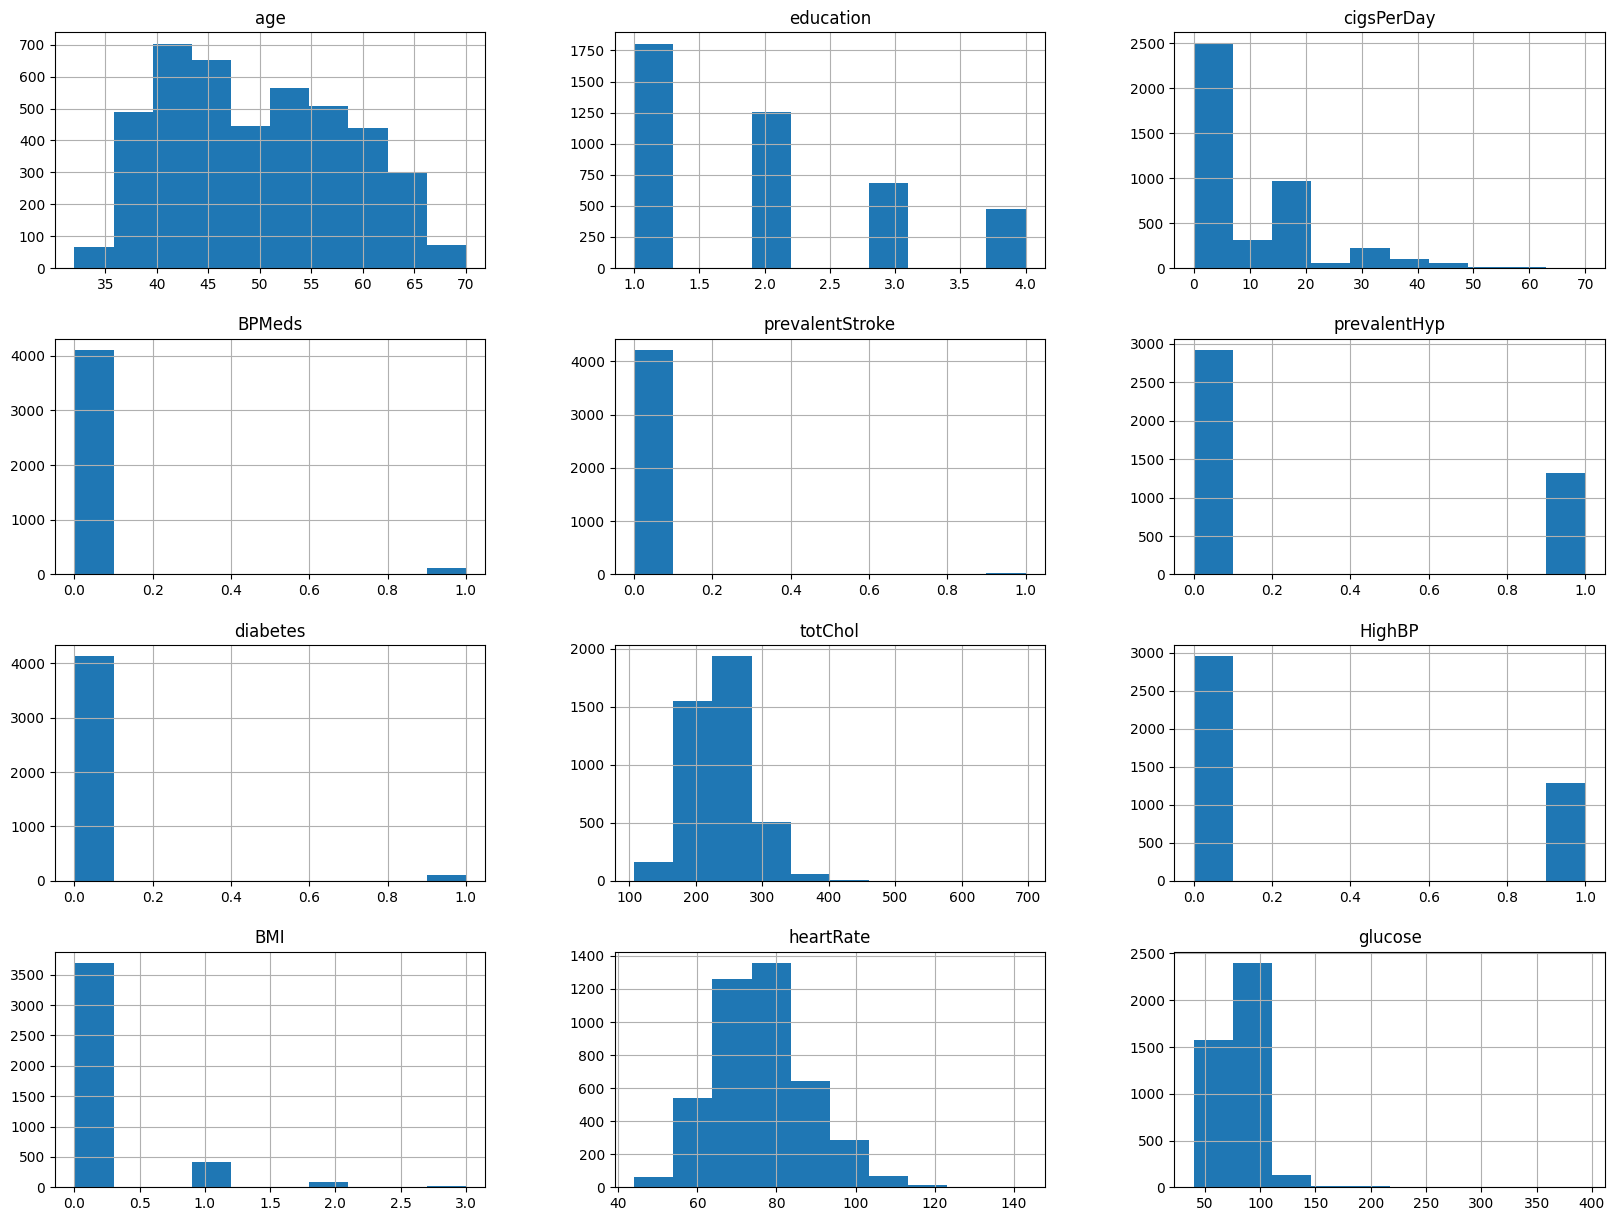

In [30]:
df_2[df_2.columns].hist(figsize=(20,15))

В данном датасете отмечается большая частота пациентов с диабетом при нормальном весе

<AxesSubplot: xlabel='BMI', ylabel='age'>

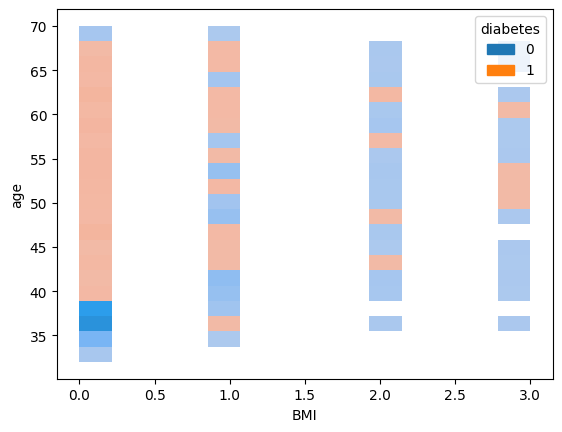

In [31]:
sns.histplot(
    data=df_2,
    y='age',
    x='BMI',
    hue='diabetes'
)

Переводим значения totChol к виду, HighChol. За отсечку берем уровень холестерина выше 240, согласно Национальным рекомендациям.

In [32]:
df_2['totChol'] = df_2['totChol'].apply(lambda x: 1 if x > 240 else 0)
df_2.rename(columns={'totChol':'HighChol'}, inplace=True)

In [33]:
df_2['is_smoking']=df_2['is_smoking'].apply(lambda x: 1 if x == "YES" else 0)
df_2.rename(columns={'is_smoking':'Smoker'}, inplace=True)

In [34]:
df_2['sex'] = df_2['sex'].astype('category')

<AxesSubplot: xlabel='sex', ylabel='glucose'>

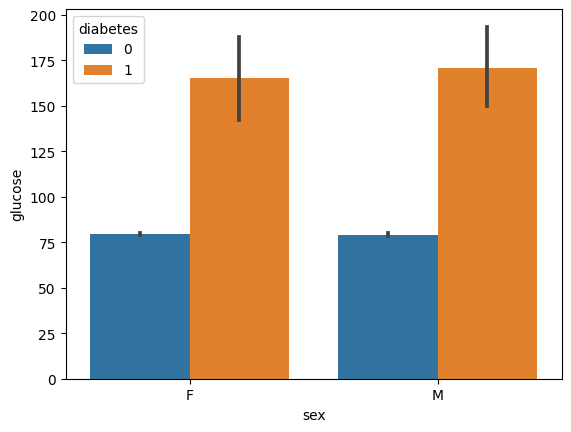

In [35]:
sns.barplot(
    data=df_2,
    y='glucose',
    x='sex',
    hue='diabetes'
)

У людей с диабетом при повышенной массе тела риск Гипертонической болезни выше.

<AxesSubplot: xlabel='diabetes', ylabel='BMI'>

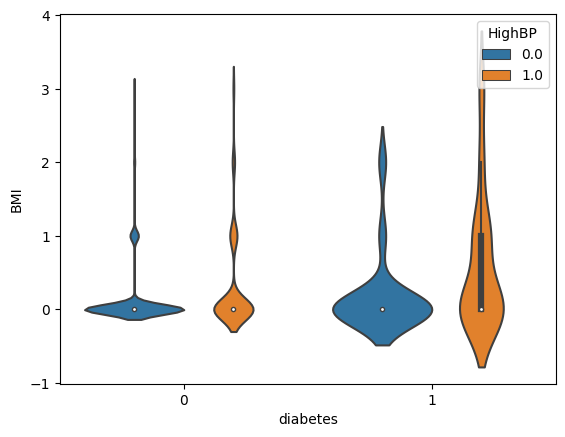

In [36]:
sns.violinplot(
    data=df_2,
    x='diabetes',
    y='BMI',
    hue='HighBP'
)

Всего 100 человека получает гипотензивную терапию при повышенных уровнях артериального давления.

In [37]:
BPMed = df_2[df_2['HighBP']==1]['BPMeds'].value_counts()


Объединение первого и второго датасета.


In [38]:
diabetes.rename(
    columns={
        'Glucose':'glucose',
        'BloodPressure':'HighBP',
        'Age':'age',
        'Outcome':'diabetes'
    }, inplace= True
)

In [39]:
df_2_2 = pd.concat([df_2, diabetes], axis=0, ignore_index=True, join='outer')

In [40]:
df_2_2.drop_duplicates(inplace=True)
df_2_2.columns

Index(['age', 'education', 'sex', 'Smoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'HighChol', 'HighBP',
       'BMI', 'heartRate', 'glucose', 'Pregnancies', 'SkinThickness',
       'Insulin', 'DiabetesPedigreeFunction'],
      dtype='object')

In [41]:
cols_null = df_2_2.isnull().mean() * 100
cols_withnull = cols_null[
    cols_null > 0
].sort_values(ascending=True)
cols_withnull

BMI                          0.099980
glucose                      1.679664
sex                         15.356929
Smoker                      15.356929
prevalentStroke             15.356929
prevalentHyp                15.356929
HighChol                    15.356929
heartRate                   15.356929
cigsPerDay                  15.496901
BPMeds                      15.536893
education                   15.716857
Pregnancies                 84.643071
SkinThickness               84.643071
Insulin                     84.643071
DiabetesPedigreeFunction    84.643071
dtype: float64

In [42]:
thresh = df_2_2.shape[0]*0.7
df_2_2 = df_2_2.dropna(thresh=thresh, axis=1)
df_2_2.isna().sum()

age                  0
education          786
sex                768
Smoker             768
cigsPerDay         775
BPMeds             777
prevalentStroke    768
prevalentHyp       768
diabetes             0
HighChol           768
HighBP               0
BMI                  5
heartRate          768
glucose             84
dtype: int64

array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'education'}>,
        <AxesSubplot: title={'center': 'Smoker'}>,
        <AxesSubplot: title={'center': 'cigsPerDay'}>],
       [<AxesSubplot: title={'center': 'BPMeds'}>,
        <AxesSubplot: title={'center': 'prevalentStroke'}>,
        <AxesSubplot: title={'center': 'prevalentHyp'}>,
        <AxesSubplot: title={'center': 'diabetes'}>],
       [<AxesSubplot: title={'center': 'HighChol'}>,
        <AxesSubplot: title={'center': 'HighBP'}>,
        <AxesSubplot: title={'center': 'BMI'}>,
        <AxesSubplot: title={'center': 'heartRate'}>],
       [<AxesSubplot: title={'center': 'glucose'}>, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

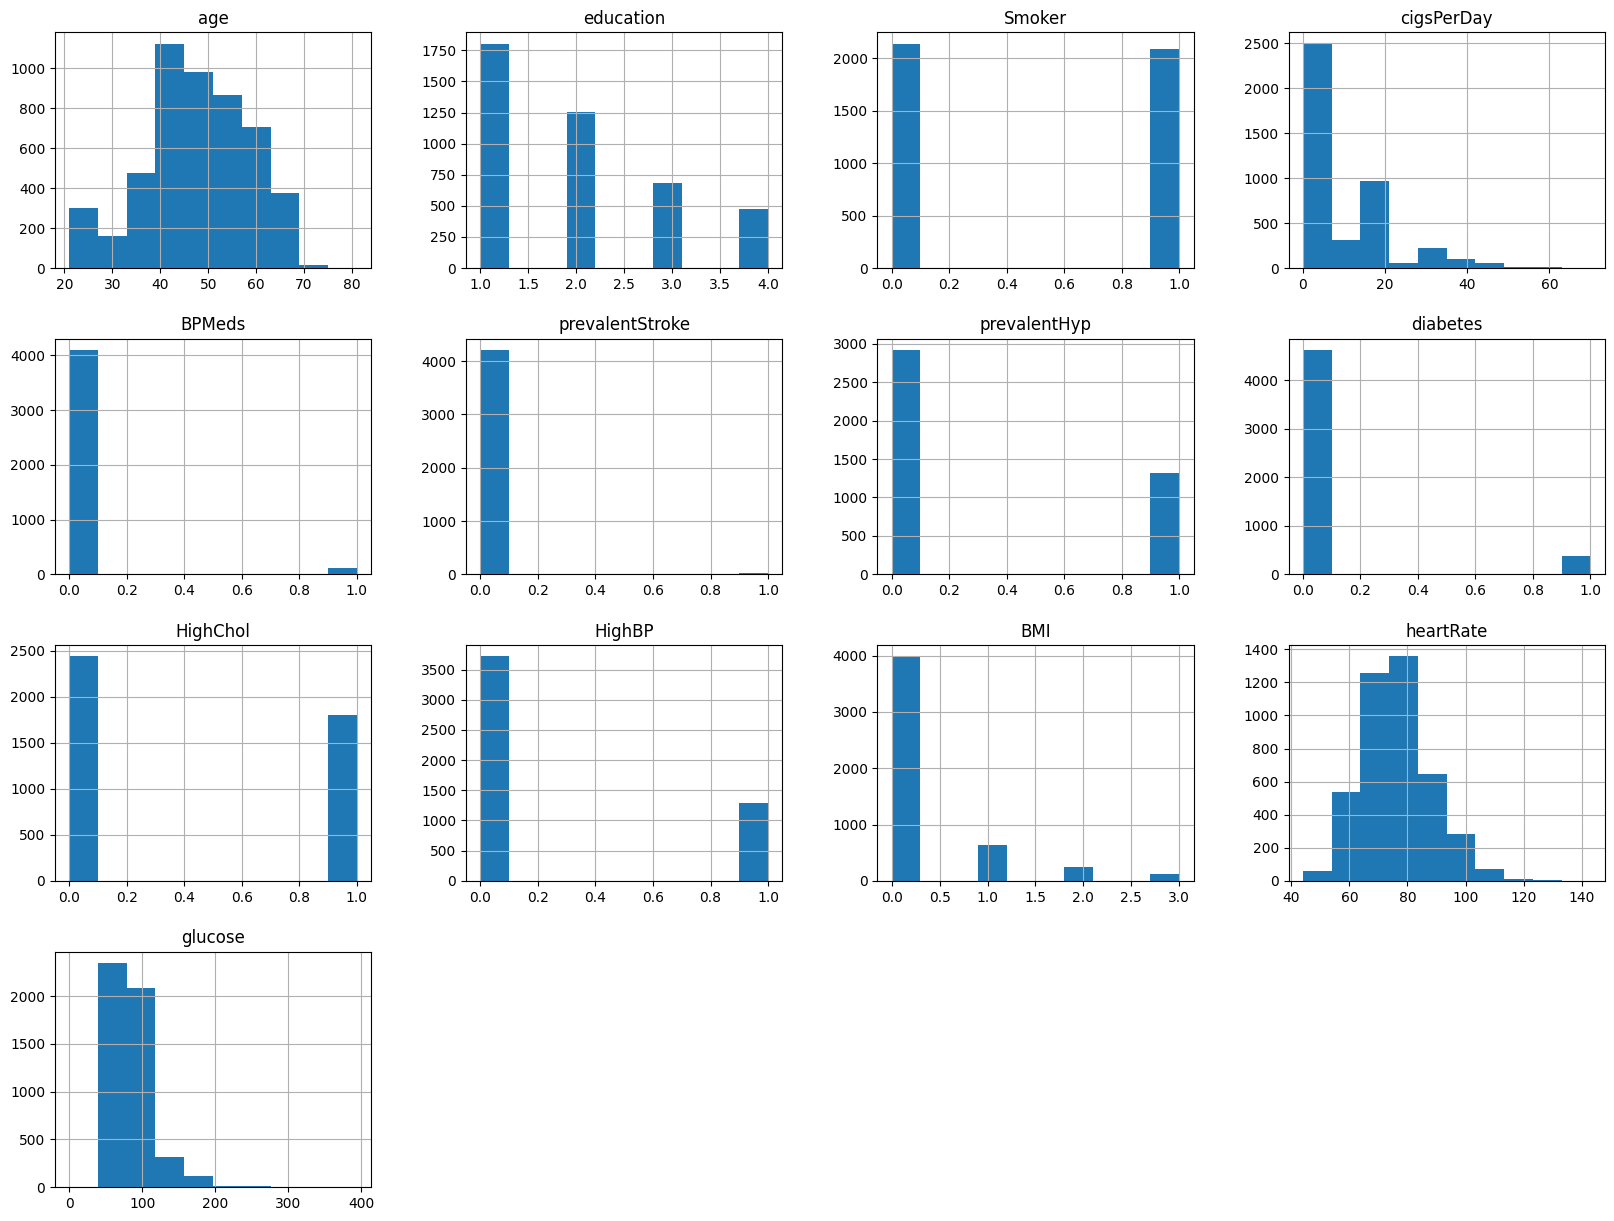

In [43]:

df_2_2[df_2_2.columns].hist(figsize=(20,15))

Отмечается новая взаимосвязи между: курящими и количество выкуренных сигарет в день; риски гипертензии/возраста с высоким АД; возрасла взаимосвязи ИМТ и диабета.

C:\Users\rinen\AppData\Local\Temp\ipykernel_15464\4190894819.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_2_2.corr(), cmap='Greys', vmax=1, vmin=-1)


<AxesSubplot: >

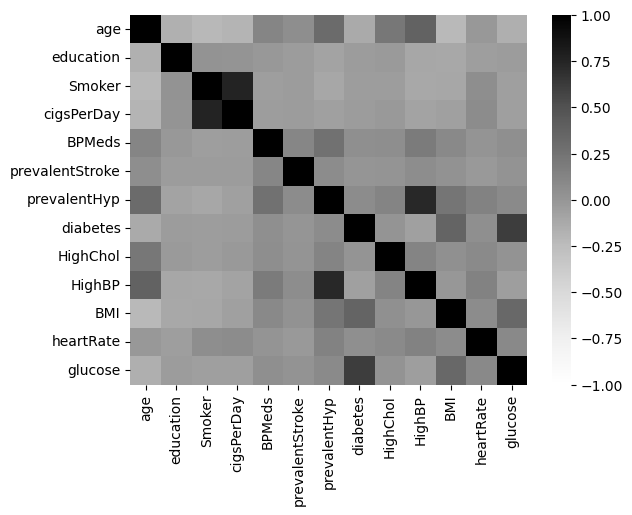

In [81]:
sns.heatmap(df_2_2.corr(), cmap='Greys', vmax=1, vmin=-1)

У людей старше 60 лет, страдающих гипертонией, чаще подтверждался диагноз СД.

<AxesSubplot: xlabel='HighBP', ylabel='age'>

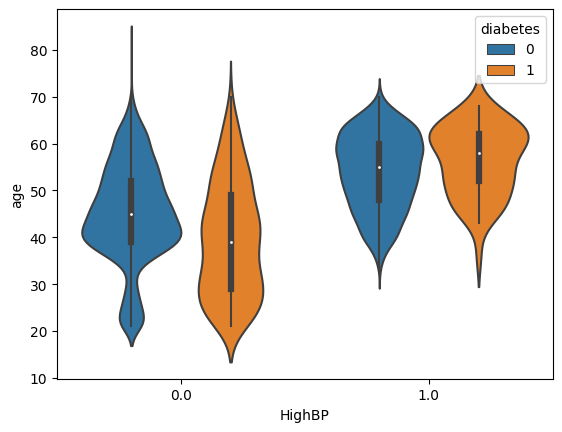

In [96]:
sns.violinplot(
    data= df_2_2,
    y='age',
    x='HighBP',
    hue='diabetes'
)

<AxesSubplot: xlabel='HighBP', ylabel='age'>

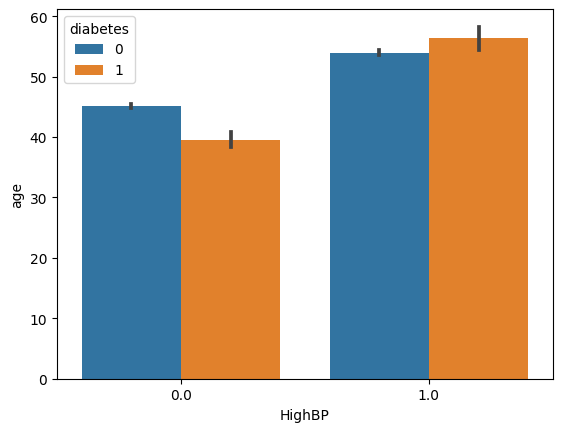

In [123]:
sns.barplot(
    df_2_2,
    x="HighBP",
    y='age',
    hue='diabetes'
)

In [124]:
df_3_1=pd.read_csv('data/diabetes_012_health_indicators_BRFSS2015.csv')
df_3_2=pd.read_csv('data/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
df_3_3=pd.read_csv('data/diabetes_binary_health_indicators_BRFSS2015.csv')

In [125]:
df_3_1 = df_3_1.rename(columns={'Diabetes_012':'Diabetes_binary'})

In [126]:
df_3 = pd.concat([df_3_1,df_3_2,df_3_3], ignore_index=True)
df_3.rename(columns={'Diabetes_binary':'diabetes', 'Age': 'age'}, inplace=True)
df_3

,diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578047,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
578048,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
578049,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
578050,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [127]:
df_3['BMI']=  df_3['BMI'].apply(BMI_I)

<AxesSubplot: >

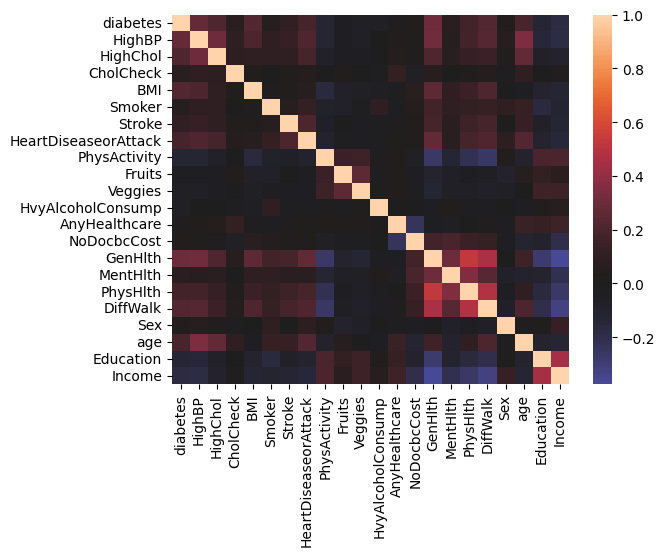

In [128]:
sns.heatmap(df_3.corr(),center=0)

array([[<AxesSubplot: title={'center': 'diabetes'}>,
        <AxesSubplot: title={'center': 'HighBP'}>,
        <AxesSubplot: title={'center': 'HighChol'}>,
        <AxesSubplot: title={'center': 'CholCheck'}>,
        <AxesSubplot: title={'center': 'BMI'}>],
       [<AxesSubplot: title={'center': 'Smoker'}>,
        <AxesSubplot: title={'center': 'Stroke'}>,
        <AxesSubplot: title={'center': 'HeartDiseaseorAttack'}>,
        <AxesSubplot: title={'center': 'PhysActivity'}>,
        <AxesSubplot: title={'center': 'Fruits'}>],
       [<AxesSubplot: title={'center': 'Veggies'}>,
        <AxesSubplot: title={'center': 'HvyAlcoholConsump'}>,
        <AxesSubplot: title={'center': 'AnyHealthcare'}>,
        <AxesSubplot: title={'center': 'NoDocbcCost'}>,
        <AxesSubplot: title={'center': 'GenHlth'}>],
       [<AxesSubplot: title={'center': 'MentHlth'}>,
        <AxesSubplot: title={'center': 'PhysHlth'}>,
        <AxesSubplot: title={'center': 'DiffWalk'}>,
        <AxesSubplot: ti

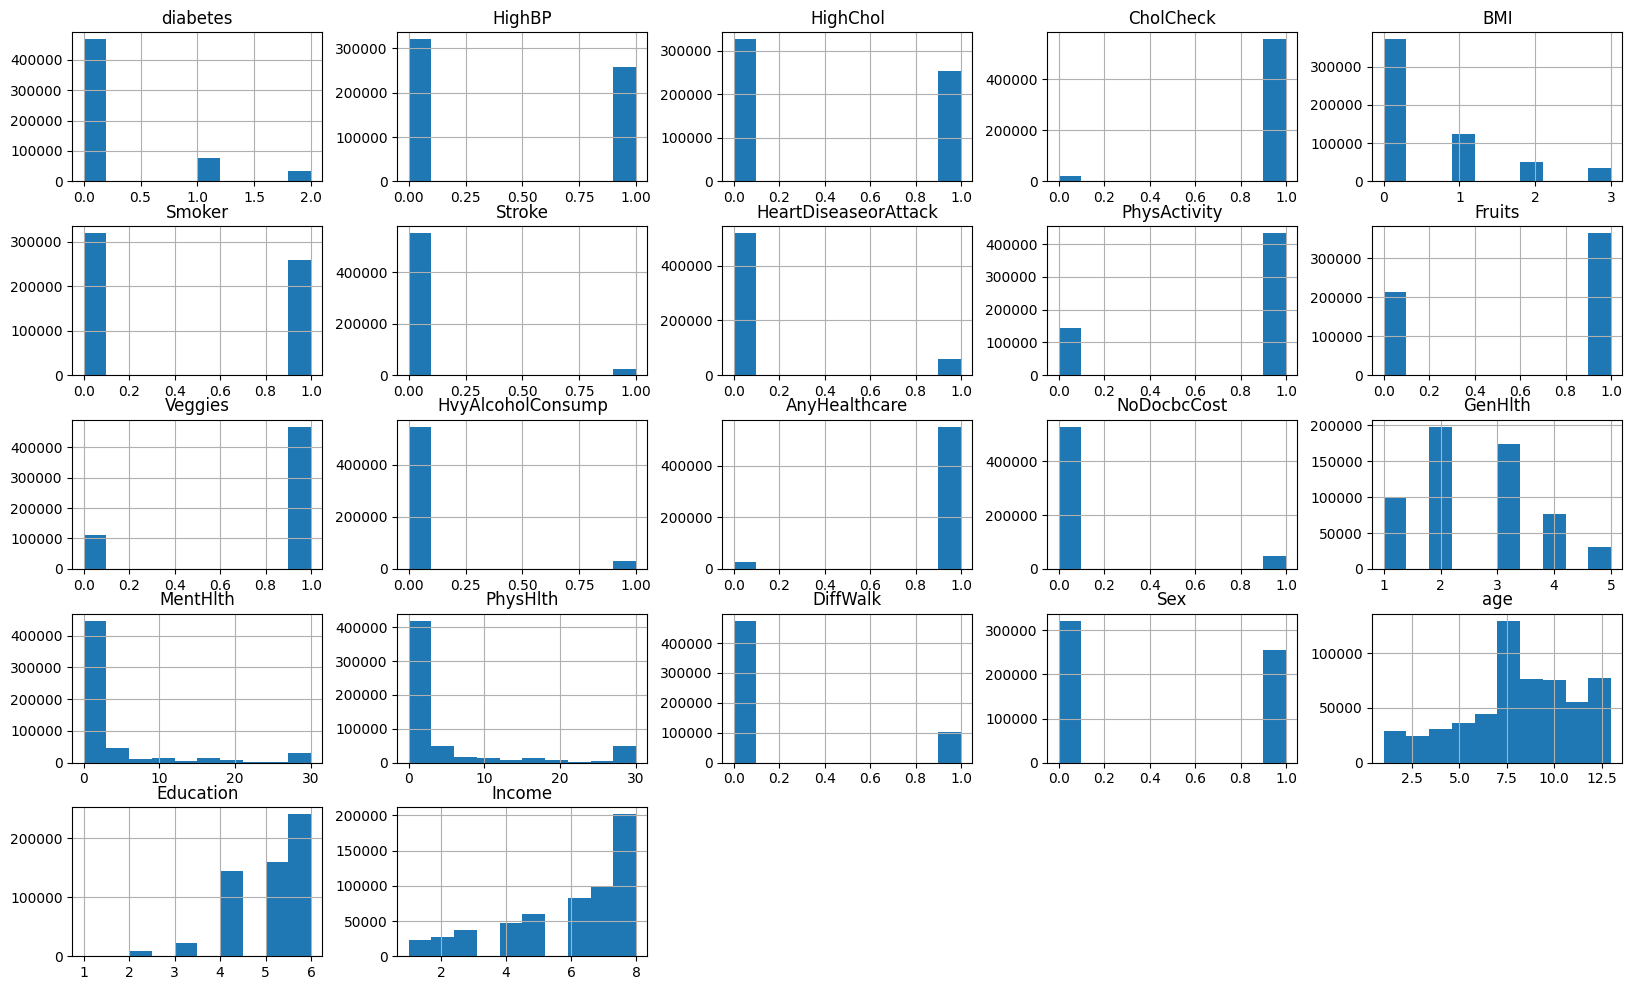

In [129]:
df_3[df_3.columns].hist(figsize=(20,12))

In [136]:
df_2_2.columns

Index(['age', 'education', 'sex', 'Smoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'HighChol', 'HighBP',
       'BMI', 'heartRate', 'glucose'],
      dtype='object')

In [137]:

df_3 =df_3.rename(columns={'Sex':'sex','Education':'education'})

In [141]:
df_4 = pd.concat([df_2_2,df_3], axis=0, join='outer', ignore_index= True)
df_4.isna().sum()

age                          0
education                  786
sex                        768
Smoker                     768
cigsPerDay              578827
BPMeds                  578829
prevalentStroke         578820
prevalentHyp            578820
diabetes                     0
HighChol                   768
HighBP                       0
BMI                          5
heartRate               578820
glucose                 578136
CholCheck                 5001
Stroke                    5001
HeartDiseaseorAttack      5001
PhysActivity              5001
Fruits                    5001
Veggies                   5001
HvyAlcoholConsump         5001
AnyHealthcare             5001
NoDocbcCost               5001
GenHlth                   5001
MentHlth                  5001
PhysHlth                  5001
DiffWalk                  5001
Income                    5001
dtype: int64